In [1]:
import pandas as pd
import numpy as np

### 주정차 단속현황 구하기

In [2]:
ipw= pd.read_csv('주정차 단속현황.csv')
ipw

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시
0,2022-01-01 2:29,40000,중곡동,서울특별시 광진구 영화사로5길 19,교통소통장애,미견인
1,2022-01-01 6:41,80000,중곡동,150-196,소화전,미견인
2,2022-01-01 7:02,40000,구의동,서울 광진구 구의동 660-1 주차장앞,교통소통장애,미견인
3,2022-01-01 7:29,40000,구의동,서울 광진구 구의동 6-4,횡단보도,견인처리
4,2022-01-01 10:55,40000,구의동,리젠트오피스텔건너편,안전지대,미견인
...,...,...,...,...,...,...
39727,2023-02-28 20:43,32000,군자동,군자빌딩,주정차금지(황색실선)구역,미견인
39728,2023-02-28 21:23,8000,자양동,서울 광진구 자양동 659-32,보도,미견인
39729,2023-02-28 21:38,32000,화양동,서울 광진구 능동로 154,보도,미견인
39730,2023-02-28 22:36,32000,자양동,서울 광진구 자양동 12-10,교차로,미견인


In [3]:
#필요한 칼럼만 추출
use_cols=['단속동','단속장소']

In [4]:
ipw=ipw[use_cols]
ipw

,단속동,단속장소
0,중곡동,서울특별시 광진구 영화사로5길 19
1,중곡동,150-196
2,구의동,서울 광진구 구의동 660-1 주차장앞
3,구의동,서울 광진구 구의동 6-4
4,구의동,리젠트오피스텔건너편
...,...,...
39727,군자동,군자빌딩
39728,자양동,서울 광진구 자양동 659-32
39729,화양동,서울 광진구 능동로 154
39730,자양동,서울 광진구 자양동 12-10


In [5]:
ipw.단속장소.nunique()

6009

### 단속지점명 당 단속건수 구하기

In [6]:
#단속지점명 당 단속건수 구하기
ipw=ipw.groupby(['단속장소'],as_index= False).agg('count')
ipw.rename(columns={'단속장소':'단속지점명'},inplace = True)
ipw.rename(columns={'단속동':'단속건수'}, inplace = True)
ipw

,단속지점명,단속건수
0,01월 01일,1
1,01월 02일,1
2,01월 03일,1
3,01월 06일,13
4,01월 19일,1
...,...,...
6004,프라임아파트 정문(213동),234
6005,하이프라자 광진군자점 인근,5
6006,한강북자전거길,4
6007,한국보건의료인 국가시험원 앞,81


In [7]:
ipw.단속건수.sum() # 단속건수 39732개

39732

### 위도, 경도 값을 가지는 데이터 가져오기

In [8]:
ipw_a =pd.read_csv("서울시 광진구 불법주정차 위반 단속 CCTV 위치정보.csv")
ipw_a.head()

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.106990,광진구,SK강평주유소 앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.102410,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.081780,광진구,아차산역 5번출구 앞,불법주정차구역
3,서울 광진구 군자동 503,37.548609,127.071072,광진구,두산위브 앞,불법주정차구역
4,서울 광진구 구의동 66-62,37.545348,127.088420,광진구,국민은행 앞,불법주정차구역


### 단속건수와 위도,경도 값을 얻기 위해 두개의 데이터 테이블 벙합

In [9]:
#두개의 데이어프레임 병합 후 단속지점명 띄어씌기 삭제
ipw_merge=pd.merge(ipw,ipw_a)
ipw_merge['단속지점명']=ipw_merge['단속지점명'].str.replace(' ','')
ipw_merge.head()

,단속지점명,단속건수,고정형CCTV지번주소,위도,경도,자치구,현장구분
0,CU자양써밋플레이스점건너,342,서울 광진구 자양동 547-64,37.537536,127.068208,광진구,불법주정차구역
1,MB모터스옆,787,서울 광진구 중곡동 247-6,37.563661,127.078227,광진구,불법주정차구역
2,강변스파랜드앞,401,서울 광진구 구의동 593-15,37.535074,127.091264,광진구,불법주정차구역
3,강변역1번출구,744,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,불법주정차구역
4,강변역4번출구,400,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,불법주정차구역


In [10]:
ipw_merge['단속건수'].sum() #병합 후 단속건수 13966

13966

#### 행정동 정보가 나와있는 데이터

In [11]:
#행정동이 나와있는 데이터
ipw_b= pd.read_csv("광진구 불법주정차 편집본.csv")
ipw_b.head()

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,광진구 광장동 331-6,37.547710,127.106845,광진구,모두투어앞,불법주정차구역
1,광진구 광장동 445-3,37.543603,127.102431,광진구,광현교회앞,불법주정차구역
2,광진구 구의2동 96,37.551937,127.089448,광진구,아차산역 5번출구 앞,불법주정차구역
3,광진구 군자동 361-8,37.548913,127.070786,광진구,두산위브 앞,불법주정차구역
4,광진구 구의2동 66-62,37.545200,127.087981,광진구,국민은행앞,불법주정차구역


In [12]:
# merge를 사용하기 위하여 칼럼이름 같게 해주기
# replace를 통해 띄어쓰기 삭제해서 단속지점명을 최대한 같게 해주기
ipw_b=ipw_b[['고정형CCTV지번주소','단속지점명']]
ipw_b.rename(columns={'고정형CCTV지번주소':'행정동지번주소'}, inplace = True)
ipw_b['단속지점명']=ipw_b['단속지점명'].str.replace(' ','')
ipw_b.head()

,행정동지번주소,단속지점명
0,광진구 광장동 331-6,모두투어앞
1,광진구 광장동 445-3,광현교회앞
2,광진구 구의2동 96,아차산역5번출구앞
3,광진구 군자동 361-8,두산위브앞
4,광진구 구의2동 66-62,국민은행앞


### 위에서 만든 데이터 프레임과 행정동 데이터 프레임 합치기


In [13]:
# 위에서 합친 데이터프레임과 행정동이 나와있는 데이터프레임 합치기
ipw_hang=pd.merge(ipw_merge,ipw_b)
ipw_hang.head()

,단속지점명,단속건수,고정형CCTV지번주소,위도,경도,자치구,현장구분,행정동지번주소
0,CU자양써밋플레이스점건너,342,서울 광진구 자양동 547-64,37.537536,127.068208,광진구,불법주정차구역,자양4동 547-29
1,MB모터스옆,787,서울 광진구 중곡동 247-6,37.563661,127.078227,광진구,불법주정차구역,광진구 중곡1동 247-6
2,강변스파랜드앞,401,서울 광진구 구의동 593-15,37.535074,127.091264,광진구,불법주정차구역,광진구 구의3동 593-20
3,강변역1번출구,744,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,불법주정차구역,광진구 구의3동 546-6
4,강변역4번출구,400,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,불법주정차구역,광진구 구의3동 546-6


In [14]:
ipw_hang['단속건수'].sum() #행정동 데이터 병합한 후 단속건수 11796

11796

In [15]:
#도로명주소에서 행정동만 추출하기
def split_data(sp1):
    sp2 = sp1.split(" ")[1]
    if str.isdigit(sp2[0]):
        sp2 = sp1.split(" ")[0]
    return sp2

In [16]:
ipw_hang['행정동'] = ipw_hang['행정동지번주소'].apply(split_data)
ipw_hang.head()

,단속지점명,단속건수,고정형CCTV지번주소,위도,경도,자치구,현장구분,행정동지번주소,행정동
0,CU자양써밋플레이스점건너,342,서울 광진구 자양동 547-64,37.537536,127.068208,광진구,불법주정차구역,자양4동 547-29,자양4동
1,MB모터스옆,787,서울 광진구 중곡동 247-6,37.563661,127.078227,광진구,불법주정차구역,광진구 중곡1동 247-6,중곡1동
2,강변스파랜드앞,401,서울 광진구 구의동 593-15,37.535074,127.091264,광진구,불법주정차구역,광진구 구의3동 593-20,구의3동
3,강변역1번출구,744,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,불법주정차구역,광진구 구의3동 546-6,구의3동
4,강변역4번출구,400,서울 광진구 구의동 546-6,37.535668,127.094522,광진구,불법주정차구역,광진구 구의3동 546-6,구의3동


In [17]:
#행정동별로 단속건수 구하기
ipw_hang1=ipw_hang.groupby(['행정동'],as_index = False).agg('sum').iloc[:,:2]
ipw_hang1

,행정동,단속건수
0,광장동,125
1,구의1동,991
2,구의2동,273
3,구의3동,4823
4,군자동,914
5,능동,224
6,자양1동,394
7,자양2동,817
8,자양4동,659
9,중곡1동,1352


In [18]:
#누락된 중곡4동 데이터 추가하기
joong_gok4=ipw[(ipw['단속지점명']=='우리은행 앞') | (ipw['단속지점명']=='공원약국 앞')]
joong_gok4['단속건수'].sum()

624

In [19]:
joong_gok4=pd.DataFrame({'행정동':['중곡4동','자양3동'], '단속건수': ['624','0']})
joong_gok4

,행정동,단속건수
0,중곡4동,624
1,자양3동,0


In [20]:
ipw_data=pd.concat([ipw_hang1,joong_gok4])
ipw_data.index=range(len(ipw_data))
ipw_data


,행정동,단속건수
0,광장동,125
1,구의1동,991
2,구의2동,273
3,구의3동,4823
4,군자동,914
5,능동,224
6,자양1동,394
7,자양2동,817
8,자양4동,659
9,중곡1동,1352


## 단속건수 200개 단위로 나누기

In [21]:
ipw_hang0 = ipw_hang[(ipw_hang['단속건수'] > 0) & (ipw_hang['단속건수'] < 200)]
ipw_hang0.index = range(len(ipw_hang0))

ipw_hang200 = ipw_hang[(ipw_hang['단속건수'] > 200 ) & (ipw_hang['단속건수'] < 400)]
ipw_hang200.index = range(len(ipw_hang200))

ipw_hang400 = ipw_hang[ipw_hang['단속건수'] > 400]
ipw_hang400.index = range(len(ipw_hang400))

## 행정동 단위로 시각화

In [22]:
import requests
url = 'https://raw.githubusercontent.com/vuski/admdongkor/master/ver20230401/HangJeongDong_ver20230401.geojson'
response = requests.get(url).json()

# 키 값 확인
response.keys()
# dict_keys(['type', 'name', 'crs', 'bbox', 'features'])

# 전국 데이터에서 서울시만 추출
seoul_geo = response.copy()
seoul_geo['features'] = []

# 서울시 행정동 경계만 추출
for i in response['features']:
    if i['properties']['sggnm'] == '광진구':
        seoul_geo['features'].append(i)

# 행정동 수 확인
len(seoul_geo['features'])
# 426

15

In [44]:
import folium
from folium import Marker

m = folium.Map(
    location=[37.53913,127.08366],
    zoom_start=13, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

for i in range(len(ipw_hang0)):
      Marker(location = [ipw_hang0.loc[i]['위도'], ipw_hang0.loc[i]['경도']],
           tooltip=ipw_hang0.loc[i]['단속지점명'], icon=folium.Icon(color='blue')
          ).add_to(m) # 200건수 이하는 파랑색
for i in range(len(ipw_hang200)):
      Marker(location = [ipw_hang200.loc[i]['위도'], ipw_hang200.loc[i]['경도']],
           tooltip=ipw_hang200.loc[i]['단속지점명'], icon=folium.Icon(color='purple')
          ).add_to(m) # 200건수 400건수 이하는 보라색
for i in range(len(ipw_hang400)):
      Marker(location = [ipw_hang400.loc[i]['위도'], ipw_hang400.loc[i]['경도']],
           tooltip=ipw_hang400.loc[i]['단속지점명'], icon=folium.Icon(color='black')
          ).add_to(m) # 400건수 이상은 검정색
m

# 공영주차장 데이터

In [28]:
parking= pd.read_csv('광진구_공영주차장 정보.csv')
pl=parking.iloc[:,2:7]
pl.head()

,동명,시설명,위치,부지면적,주차면수 소계
0,중곡1동,중곡제일전통시장 공영,중곡1동 221-6,695,21
1,중곡2동,장신구,중곡2동 133-10,531,22
2,중곡2동,중곡동복개천,중곡2동 150-196,NaN,78
3,중곡3동,중곡3동마을공원,중곡3동 195-1,3038.3,162
4,중곡3동,중곡체육센터,중곡3동 168-8,"3,690.00",6


In [29]:
#겶측값 확인
pl.isnull().sum()

동명         0
시설명        0
위치         0
부지면적       4
주차면수 소계    0
dtype: int64

#### 결측값을 갖는 칼럼 드랍 후 행정동 별 주차면수 구하기

In [30]:
pl.drop("부지면적", axis= 1, inplace= True)
pl_space=(
    pl
    .groupby(['동명'])
    .agg('mean')
    .round(0)
    .astype('int64')
)
pl_space

,주차면수 소계
동명,
광장동,9
구의1동,103
구의2동,38
구의3동,91
군자동,44
능동,51
자양1동,24
자양2동,281
자양3동,94


<BarContainer object of 15 artists>

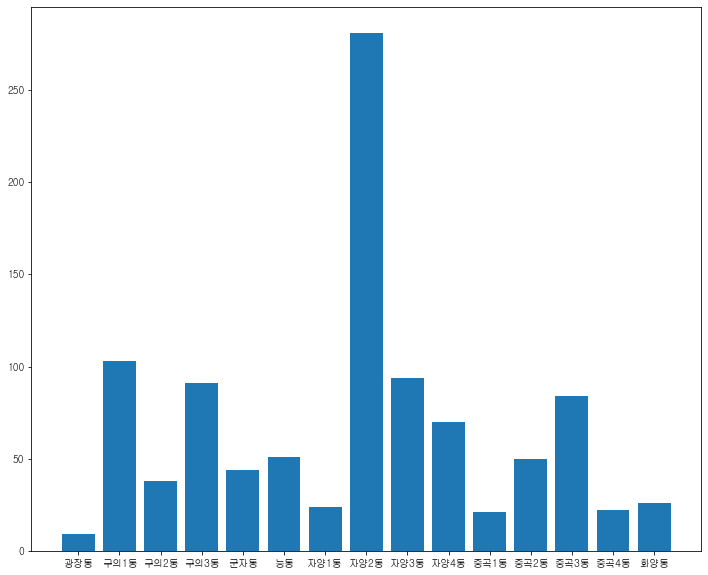

In [31]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(pl_space.index, pl_space['주차면수 소계'])


### 위치 칼럼에서 행정동 추출하기

In [33]:
def split_data(sp1):
    sp2 = sp1.split(" ")[0]
    return sp2

pl['행정동'] = pl['위치'].apply(split_data)
address_df= pl
address_df.head()

,동명,시설명,위치,주차면수 소계,행정동
0,중곡1동,중곡제일전통시장 공영,중곡1동 221-6,21,중곡1동
1,중곡2동,장신구,중곡2동 133-10,22,중곡2동
2,중곡2동,중곡동복개천,중곡2동 150-196,78,중곡2동
3,중곡3동,중곡3동마을공원,중곡3동 195-1,162,중곡3동
4,중곡3동,중곡체육센터,중곡3동 168-8,6,중곡3동


### 상위 5개 행정동의 공영주차장 데이터 가져오기

In [35]:
address_df=address_df[(address_df['행정동'] == '중곡4동') | (address_df['행정동'] == '광장동') | (address_df['행정동'] == '자양3동') | (address_df['행정동'] == '구의3동') | (address_df['행정동'] == '자양4동')]
address_df=address_df[['시설명','위치','주차면수 소계','행정동']]
address_df=address_df.sort_values(by = '행정동')
address_df.index=range(len(address_df))
address_df.head()

,시설명,위치,주차면수 소계,행정동
0,세촌,광장동 275-5,7,광장동
1,광장공동,광장동 394-43 외,8,광장동
2,큰나루,광장동 126,13,광장동
3,동서울길 공영,구의3동 609-1 일대,94,구의3동
4,구의3동 공영,구의3동 219-15,159,구의3동


## 공영주차장 좌표 데이터 

In [37]:
public_coord = pd.read_csv("공영주차장 좌표.csv")

In [39]:
#데이터 합치기
public_coord=pd.merge(public_coord,address_df)
public_coord

,시설명,위도,경도,위치,주차면수 소계,행정동
0,큰나루,37.550327,127.110333,광장동 126,13,광장동
1,동서울길 공영,37.533309,127.091284,구의3동 609-1 일대,94,구의3동
2,올림픽대교(시영),37.539790,127.097598,구의3동 623-1,19,구의3동
3,송림식당길,37.534457,127.076127,자양3동 712 일대,94,자양3동
4,자양4동 공영,37.538623,127.068184,자양4동 5-5,86,자양4동
5,행복제2,37.539956,127.066323,자양4동 10-2,53,자양4동
6,신성시장길,37.557301,127.089911,중곡4동 453 일대,33,중곡4동
7,긴고랑길공영,37.560843,127.095125,중곡4동 72-1 외,53,중곡4동
8,용마산남,37.559038,127.092153,중곡4동 69-2,25,중곡4동
9,해오름,37.557038,127.091820,중곡4동 87-14,20,중곡4동


## 공영주차장과 주정차 단속구역 시각화

In [47]:
import folium
from folium import Marker

m = folium.Map(location=[37.53913,127.08366], zoom_start=14)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)


for i in range(len(public_coord)):
      Marker(location = [public_coord.loc[i]['위도 '], public_coord.loc[i]['경도']],
           icon=folium.Icon(color='red'), tooltip =public_coord.loc[i]['주차면수 소계']
          ).add_to(m)


for i in range(len(public_coord)):
      folium.Circle(location = [public_coord.loc[i]['위도 '], public_coord.loc[i]['경도']],
           icon=folium.Icon(color='blue'), radius = 500, color = 'red', popup = 'public_p', fill_color= 'red'
          ).add_to(m)

for i in range(len(ipw_hang0)):
      Marker(location = [ipw_hang0.loc[i]['위도'], ipw_hang0.loc[i]['경도']],
           tooltip=ipw_hang0.loc[i]['단속지점명'], icon=folium.Icon(color='blue')
          ).add_to(m) # 200건수 이하는 파랑색
for i in range(len(ipw_hang200)):
      Marker(location = [ipw_hang200.loc[i]['위도'], ipw_hang200.loc[i]['경도']],
           tooltip=ipw_hang200.loc[i]['단속지점명'], icon=folium.Icon(color='purple')
          ).add_to(m) # 200건수 400건수 이하는 보라색
for i in range(len(ipw_hang400)):
      Marker(location = [ipw_hang400.loc[i]['위도'], ipw_hang400.loc[i]['경도']],
           tooltip=ipw_hang400.loc[i]['단속지점명'], icon=folium.Icon(color='black')
          ).add_to(m) # 400건수 이상은 검정색



m